In [1]:
# import phi; phi.verify()
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # second gpu


"""
Working installation
pip uninstall phiflow
pip install git+https://github.com/tum-pbs/PhiFlow@develop
pip uninstall phiml
pip install git+https://github.com/tum-pbs/PhiML@develop
"""
from phi.jax.flow import *

In [2]:
jax.devices()

[cuda(id=0)]

In [3]:
def jax_has_gpu():
    try:
        _ = jax.device_put(jax.numpy.ones(1), device=jax.devices('gpu')[0])
        return True
    except:
        return False

In [5]:
jax_has_gpu()

True

/home/do521/DA-RL/.venv/lib/python3.11/site-packages/phiml/math/_shape.py:2766: RuntimeWarning: Stacking shapes with incompatible item names will result in item names being lost. For vector Got ('x', 'y') and ('x', 'z')
  warnings.warn(f"Stacking shapes with incompatible item names will result in item names being lost. For {dim.name} Got {prev.slice_names} and {dim.slice_names}", RuntimeWarning)
/home/do521/DA-RL/.venv/lib/python3.11/site-packages/phiml/backend/_backend.py:1675: RuntimeWarning: invalid value encountered in add
  return a + b
/home/do521/DA-RL/.venv/lib/python3.11/site-packages/matplotlib/transforms.py:372: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


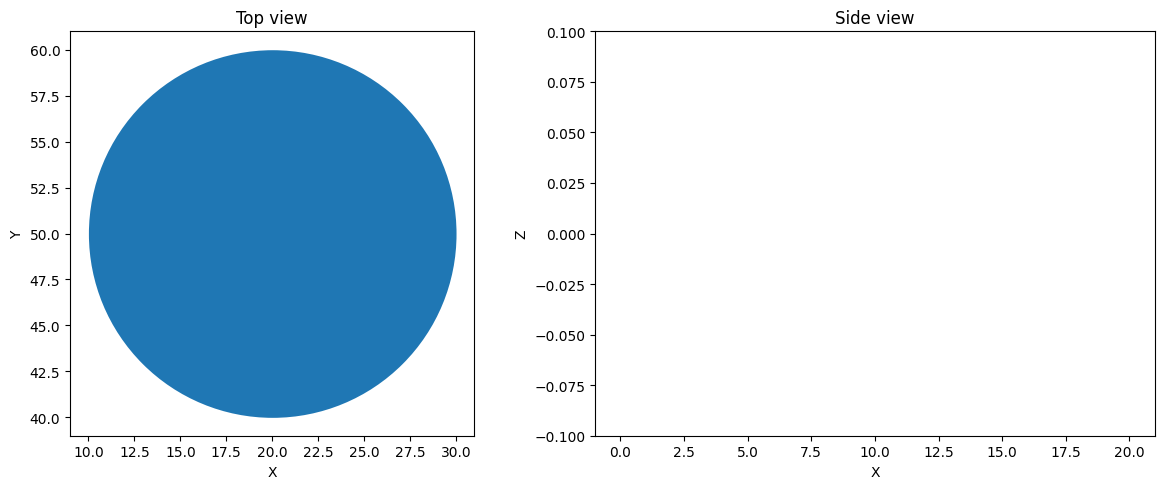

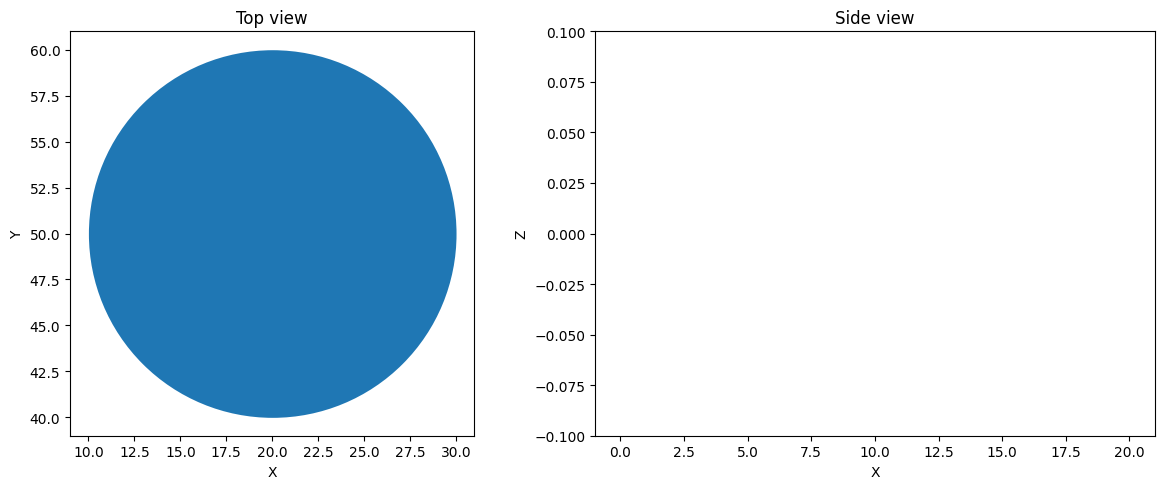

In [6]:
cylinder = geom.infinite_cylinder(x=20, y=50, radius=10, inf_dim='z')
plot({"Top view": cylinder['x,y'], "Side view": cylinder['x,z']}) # the warnings are caused by plotting

In [7]:
@jit_compile
def step(v, p, dt=1.):
    v = advect.semi_lagrangian(v, v, dt)
    v = diffuse.explicit(v, 0.01, dt) # notebook doesn't have it but it's in Navier-Stokes? compare the results with Fenics solver?
    return fluid.make_incompressible(v, cylinder, Solve(x0=p))

boundary = {'x-': vec(x=2, y=0, z=0), 'x+': ZERO_GRADIENT, 'y': PERIODIC, 'z': PERIODIC}
v0 = StaggeredGrid((8., 0, 0), boundary, x=128, y=64, z=8, bounds=Box(x=200, y=100, z=5))

In [8]:
v0, p0 = fluid.make_incompressible(v0, cylinder, Solve())

In [ ]:
v_trj, p_trj = iterate(step, batch(time=1000), v0, p0)

In [11]:
v_trj_2d = v_trj[{'z': 4, 'vector': 'x,y'}]
plot(v_trj_2d.time[100:].curl(), animate='time')

<Figure size 640x480 with 0 Axes>

In [20]:
v_trj[{'vector':'x,y,z'}]

Field[(xˢ=128, yˢ=64, zˢ=8, timeᵇ=1001, vectorᶜ=x,y,z)]

In [7]:
b = v_trj.numpy()

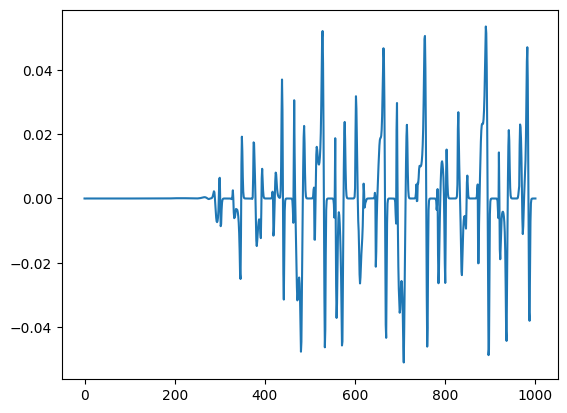

In [ ]:
plt.plot(b[0,:,60,20,4])

In [9]:
a = v_trj_2d.curl().numpy()
a = v_trj_2d.numpy()

In [11]:
a.shape

(2, 101, 128, 64)

In [8]:
import matplotlib.pyplot as plt
time_idx = 400
plt.imshow(a[0,time_idx,:,:])
# plt.xlim([20,40])
# plt.ylim([20,40])

NameError: name 'a' is not defined

IndexError: index 2 is out of bounds for axis 0 with size 2

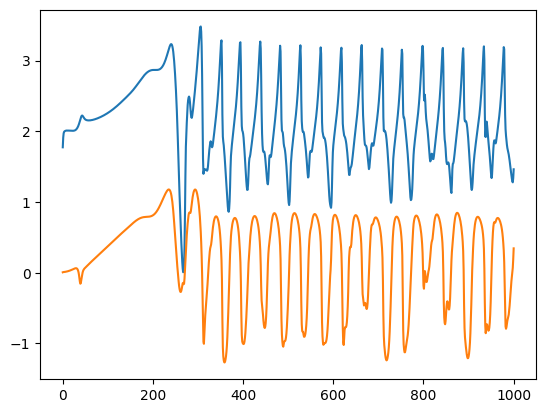

In [24]:
plt.plot(a[0,:,60,20])
plt.plot(a[1,:,60,20])
plt.plot(a[2,:,60,20])

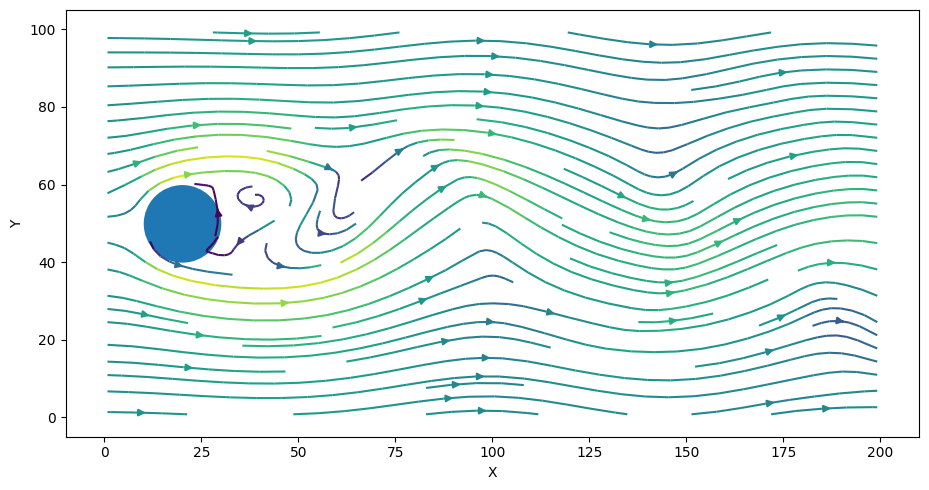

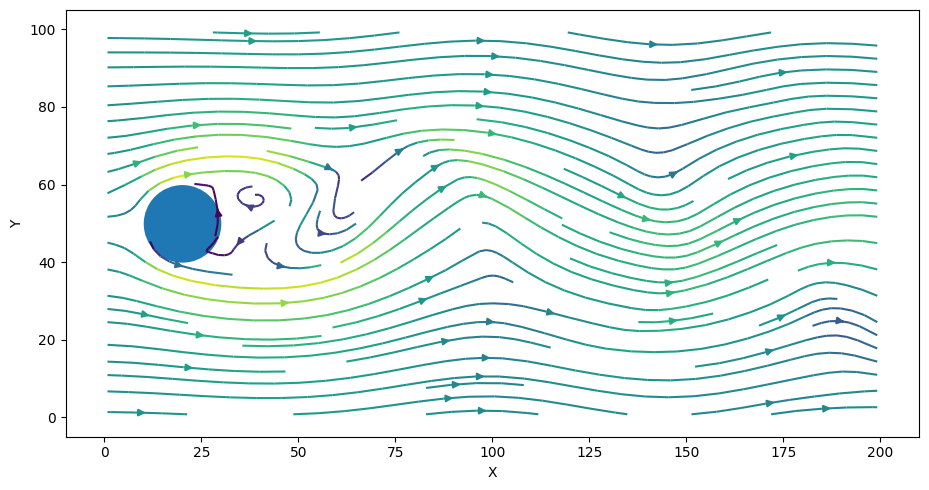

In [12]:
plot(v_trj_2d.time[-1], cylinder['x,y'], overlay='args')